## programm to read two shapefile of points and do corelation of fields

importing required libraries

In [1]:
import geopandas as gdp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sp

## geopandas.read_file("directorate/shapefile.shp")
reading shapefile using geopandas libraries


In [3]:
shapefile1=gdp.read_file("random_predicted.shp")
shapefile2=gdp.read_file("random_actual.shp")

In [4]:
shapefile1 #accessing values of columns

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,geometry
0,0.0,623.251892,578.720093,346.959900,POINT (31.15904 1.16110)
1,1.0,964.024109,853.243225,545.459717,POINT (31.11454 1.15584)
2,2.0,397.593567,548.133850,203.972687,POINT (31.02423 1.21883)
3,3.0,348.425201,448.019928,248.205780,POINT (31.14819 1.09349)
4,4.0,184.369995,276.514954,169.315613,POINT (30.94523 1.15462)
...,...,...,...,...,...
495,495.0,394.659424,484.006073,278.072968,POINT (31.17500 1.20874)
496,496.0,375.601776,567.627991,260.427032,POINT (31.04847 1.16652)
497,497.0,418.651031,553.307251,333.272614,POINT (30.90652 1.11336)
498,498.0,449.275940,595.064209,301.981720,POINT (31.09393 1.13226)


## accessing specific columns of each shapefiles

In [6]:
shp1=shapefile1[['id','SAMPLE_1','SAMPLE_2','SAMPLE_3']]
shp2=shapefile2[['id','SAMPLE_1','SAMPLE_2','SAMPLE_3']]

In [7]:
shp1

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3
0,0.0,623.251892,578.720093,346.959900
1,1.0,964.024109,853.243225,545.459717
2,2.0,397.593567,548.133850,203.972687
3,3.0,348.425201,448.019928,248.205780
4,4.0,184.369995,276.514954,169.315613
...,...,...,...,...
495,495.0,394.659424,484.006073,278.072968
496,496.0,375.601776,567.627991,260.427032
497,497.0,418.651031,553.307251,333.272614
498,498.0,449.275940,595.064209,301.981720


## creating pandas dataframe from each shapefile that will be used to concatinate

In [8]:
sh=pd.DataFrame(shp1)
sh2=pd.DataFrame(shp2)

## renaming columns of a dataframe
there are many ways of renaming 
1.  renaming specific columns dataframe.rename(columns{'old':'new'},inplace=True)
2.renaming all the columns as shown in the following code
3.replacing specific character in the column
df.columns = df.columns.str.replace('old_char', 'new_char')

In [9]:
sh2.columns=['id','blue','green','red']

## methods of combining columns from defferent dataframe
1. using concat
2.using merge

the differents is that it concat might not take into consideration order

In [10]:
# using concat
sh.columns=['id','blue_predicted','green_predicted','red_predicted']

In [69]:
sh3=pd.concat([sh,sh2])

In [70]:
sh4=sh3.dropna()

using merge() and following order of id

In [12]:
f=pd.merge(sh,sh2,how='inner',on='id')

## data cleeaning
dropping rows with NAN values
when nana rows are droped indexing is maintain in old index to reset this we use daataframe.reset_index(rop=True)

In [13]:
df=f.dropna()

dff=df.reset_index(drop=True)

In [14]:
df

,id,blue_predicted,green_predicted,red_predicted,blue,green,red
0,0.0,623.251892,578.720093,346.959900,698.0,727.0,404.0
1,1.0,964.024109,853.243225,545.459717,850.0,773.0,617.0
2,2.0,397.593567,548.133850,203.972687,348.0,506.0,177.0
3,3.0,348.425201,448.019928,248.205780,434.0,534.0,269.0
4,4.0,184.369995,276.514954,169.315613,233.0,359.0,173.0
...,...,...,...,...,...,...,...
495,495.0,394.659424,484.006073,278.072968,486.0,661.0,302.0
496,496.0,375.601776,567.627991,260.427032,331.0,557.0,219.0
497,497.0,418.651031,553.307251,333.272614,429.0,574.0,296.0
498,498.0,449.275940,595.064209,301.981720,499.0,645.0,303.0


## performing correlation of specific columns

In [15]:
 dff[['red_predicted','red']].corr()

,red_predicted,red
red_predicted,1.000000,0.829327
red,0.829327,1.000000


## preparing corelation table of all selected columns

In [18]:
data=dff[['red_predicted','green_predicted','blue_predicted','red','green','blue']]

In [19]:
data.corr()

,red_predicted,green_predicted,blue_predicted,red,green,blue
red_predicted,1.000000,0.830337,0.917407,0.829327,0.691520,0.758323
green_predicted,0.830337,1.000000,0.876268,0.761239,0.856895,0.772552
blue_predicted,0.917407,0.876268,1.000000,0.860595,0.807471,0.873393
red,0.829327,0.761239,0.860595,1.000000,0.867964,0.944083
green,0.691520,0.856895,0.807471,0.867964,1.000000,0.921543
blue,0.758323,0.772552,0.873393,0.944083,0.921543,1.000000


## using seaborn library and scartterplot method to plot correlation of two data

<AxesSubplot:xlabel='green_predicted', ylabel='green'>

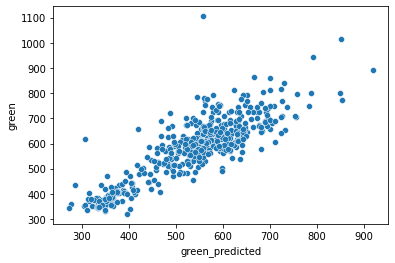

In [21]:
sp.scatterplot(x=data.green_predicted,y=data.green)


## setting x-label,y-label and title in the drawing and exporting as png

Text(0, 0.5, 'predicted blue band')

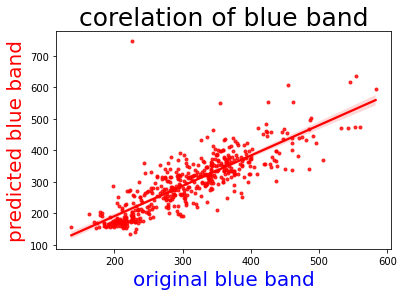

In [22]:
s=sp.regplot(x=data.red_predicted,y=data.red,marker='o',scatter_kws={'s':9},color='red')
#plt.savefig('sam1.png')
s.set_title("corelation of blue band",fontsize=25)
s.set_xlabel('original blue band',fontsize=20,color='blue')
s.set_ylabel('predicted blue band',fontsize=20,color='red')
#plt.savefig('sam2.png')

## exporting columns to csv to be used in othe r application

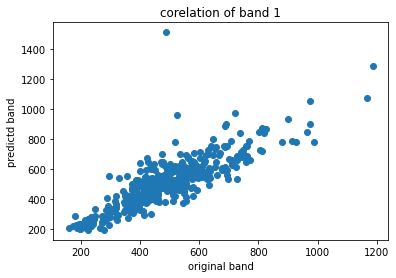

In [26]:
plt.scatter(x=data.blue_predicted,y=data.blue)
plt.title('corelation of band 1')
plt.xlabel('original band')
plt.ylabel('predictd band')
plt.show()

## using matplotlib to plot a scatter plot of correlation

In [26]:
dff[['red_predicted','green_predicted','blue_predicted','red','green','blue']].to_csv("data.csv")


## preparing a box plot for data

<AxesSubplot:>

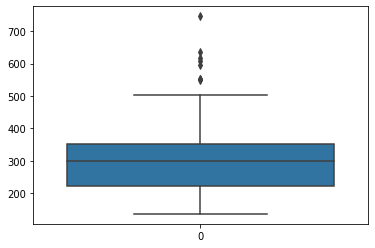

In [28]:
sp.boxplot(data=data['red'])